# Курс Python. Занятие 6. Пакеты для обработки и визуализации данных

По своей природе Питон не предназначен для обработки больших объемов данных. Однако благодаря всё той же природе из кода на Питоне можно вызывать код на других языках, поэтому были созданы пакеты для вычислений, обработки и визуализации данных, которые обращаются к функциям библиотек на Фортране и С.

Основные пакеты для вычислений, обработки и визуализации данных, которые являются базовыми и используемыми повсеместно:
- **NumPy** - многомерные массивы и операции с ними, линейная алгебра
- **Matplotlib** - визуализация данных, вдохновлённая MatLab
- **Pandas** - табличные данные и операции с ними, чтение и запись в различные форматы
- **scikit-learn** - алгоритмы машинного обучения
- **SciPy** - алгоритмы оптимизации, интерполяции, экстраполяции, статистика и т.д.

** ДИСКЛЕЙМЕР ** - подробно разберём только NumPy, материалы по Pandas и Matplotlib будем смотреть в книжке

## Часть 1. NumPy

Установка: **pip install numpy**
<br><br>
Документация: [https://docs.scipy.org/doc/numpy/user/quickstart.html](https://docs.scipy.org/doc/numpy/user/quickstart.html)
<br><br>
Книжка: [https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html)
<br><br>
Материалы:
- [Numpy Tutorial](https://www.python-course.eu/numpy.php)
- [NumPy: creating and manipulating numerical data](http://scipy-lectures.org/intro/numpy/index.html)
- [From Python to Numpy](https://www.labri.fr/perso/nrougier/from-python-to-numpy/#preface)
- [100 NumPy задач](https://pythonworld.ru/numpy/100-exercises.html)

### А есть ли проблема?

In [178]:
%%timeit

a = []
for x in range(1000):
    a.append(x**2)

340 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [179]:
%%timeit

a = [x**2 for x in range(1000)]

283 µs ± 1.22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [180]:
import numpy

In [181]:
%%timeit

a = numpy.arange(1000) ** 2

2.52 µs ± 49.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Основы: импорт пакета, массивы и их свойства

In [2]:
import numpy as np        # np - типичный псевдоним для пакета

In [23]:
# создание массива из списка
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [10]:
type(a)

numpy.ndarray

In [30]:
a.shape             # форма массива - кортеж с перечислением измерений и их размера

(3,)

In [31]:
a.ndim              # количество измерений массива (1 - вектор, 2 - матрица и т.д.)

1

In [32]:
a.dtype             # тип данных, хранящихся в массиве

dtype('int32')

In [33]:
a.size              # количество элементов в массиве

3

In [34]:
a.itemsize          # размер одного элемента в байтах

4

In [35]:
a.nbytes            # общее количество байт, занимаемых всеми элементами массива

12

In [36]:
# Пример с двумерным массивом
b = np.array([[1, 2, 3], [5, 6, 7]])
b

array([[1, 2, 3],
       [5, 6, 7]])

In [37]:
print(b.shape)
print(b.ndim)
print(b.dtype)
print(b.size)
print(b.itemsize)
print(b.nbytes)

(2, 3)
2
int32
6
4
24


### Варианты создания массивов

In [38]:
# Аналог функции range()
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
a = np.arange(0, 10, 2)
a

array([0, 2, 4, 6, 8])

In [49]:
# Линейная интерполяция
a = np.linspace(0, 1, 6)   # start, end, num-points
a

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [50]:
# Не включая конец отрезка
a = np.linspace(0, 1, 5, endpoint=False)
a

array([0. , 0.2, 0.4, 0.6, 0.8])

In [55]:
# Заполненный нулями
a = np.zeros(3)
a

array([0., 0., 0.])

In [57]:
# Двумерный массив
a = np.zeros((3, 3))
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [59]:
# Заполенный единицами
a = np.ones(3)
a

array([1., 1., 1.])

In [65]:
# Заполененный случайными числами
a = np.random.rand(3)
a

array([0.66756617, 0.00300558, 0.16189751])

In [69]:
a = np.random.randint(1, 5, (3, 3))
a

array([[3, 1, 2],
       [1, 3, 1],
       [2, 4, 1]])

### Индексация и срезы

In [71]:
# Зададим одномерный массив
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [75]:
# Обратимся к элементу с начала
a[1]

1

In [76]:
# Обратимся к элементу с конца
a[-2]

8

In [79]:
# Получим срез (как со списками)
a[2:5]

array([2, 3, 4])

In [82]:
# Изменим срез и посмотрим исходный массив
a[2:5] = np.array([0, 0, 0]) 
a

array([0, 1, 0, 0, 0, 5, 6, 7, 8, 9])

**!!! ЭТО ПЕРВОЕ ВАЖНОЕ ОТЛИЧИЕ МАССИВОВ NUMPY ОТ СПИСКОВ !!!** - срез не создаёт копию, а является указателем на кусок исходного массива (view по-английски)

In [98]:
# Теперь зададим двумерный массив
a = np.arange(9)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [99]:
# Он же одномерный! Ок, тогда так
a = a.reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [100]:
# Тогда уж сразу двумерный
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [101]:
# Теперь обратимся к элементу
a[1, 1]

4

In [102]:
# Получим срез
a[:2, :2]

array([[0, 1],
       [3, 4]])

**!!! ЭТО ВТОРОЕ ВАЖНОЕ ОТЛИЧИЕ МАССИВОВ NUMPY ОТ СПИСКОВ !!!** - индексация по нескольким измерениям производится в одних квадратных скобках через запятую

### Операции с массивами: основы

In [105]:
# Зададим два массива
a = np.arange(3)
b = np.arange(3)
a, b

(array([0, 1, 2]), array([0, 1, 2]))

In [106]:
# Сложим два массива
a + b

array([0, 2, 4])

**!!! ЭТО ТРЕТЬЕ ВАЖНОЕ ОТЛИЧИЕ МАССИВОВ NUMPY ОТ СПИСКОВ !!!** - большинство операций с массивами - поэлементные, то есть даже простое сложение - это не конкатенация массивов в один большой, а сложение соответствующих элементов друг с другом

In [107]:
# А что, если массивы разного размера?
a = np.arange(3)
b = np.arange(4)
a + b

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

In [112]:
# И всё же?
a = np.arange(3)
b = np.arange(9).reshape(3,3)
print(a)
print(b)

[0 1 2]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [113]:
a + b

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10]])

** !!! А ЭТО ПРОСТО КИЛЛЕРФИЧА NUMPY - BROADCASTING !!! **  - возможность автоматически увеличить размерность для успешного выполнения операции

![Broadcasting](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

### Операции с массивами: виды

In [115]:
# Зададим два массива
a = np.arange(3)
b = np.arange(3)
a, b

(array([0, 1, 2]), array([0, 1, 2]))

In [118]:
# Поэлементные операции
a + b, a - b, a * b, a / b, a // b, a % b,  a ** b

C:\Users\pikvic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\pikvic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in floor_divide
  
C:\Users\pikvic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in remainder
  


(array([0, 2, 4]),
 array([0, 0, 0]),
 array([0, 1, 4]),
 array([nan,  1.,  1.]),
 array([0, 1, 1], dtype=int32),
 array([0, 0, 0], dtype=int32),
 array([1, 1, 4], dtype=int32))

In [123]:
# Ещё поэлементные операции, но унарные (часть из них)
-a, np.abs(a), np.floor(a), np.sin(a), np.exp(a)

(array([ 0, -1, -2]),
 array([0, 1, 2]),
 array([0., 1., 2.]),
 array([0.        , 0.84147098, 0.90929743]),
 array([1.        , 2.71828183, 7.3890561 ]))

In [124]:
# Приведение типов
a.astype(np.float32)

array([0., 1., 2.], dtype=float32)

In [125]:
# Sum, Min, Max и т.д.
a.sum(), a.min(), a.max(), a.mean(), a.argmin(), a.std()

(3, 0, 2, 1.0, 0, 0.816496580927726)

### Операции сравнения

In [128]:
a = np.arange(0, 3)
b = np.arange(3, 6)
a, b

(array([0, 1, 2]), array([3, 4, 5]))

In [129]:
a > b

array([False, False, False])

In [130]:
a < b

array([ True,  True,  True])

In [131]:
a != b

array([ True,  True,  True])

### Fancy Indexing

In [143]:
i = [False, True, False]

In [144]:
a[i]

array([1])

In [145]:
a[a < b]

array([0, 1, 2])

In [146]:
a[a > b]

array([], dtype=int32)

In [155]:
a[a > b - 2*a]

array([ True,  True,  True])

In [160]:
# Можно и целыми числами
ind = [2, 4, 6]
a = np.arange(10, 20)
a[ind]

array([12, 14, 16])

** !!! ЭТО ЕЩЁ ОДНА КИЛЛЕРФИЧА NUMPY - FANCY INDEXING !!! **  - возможность в качестве индексов указать массив или список с элементами типа bool или int и получить срез с нужными элементами

In [161]:
# Количество элементов a, которые больше 1
np.sum(a > 1)

10

### Булевы операции с булевыми массивами

In [162]:
a = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
b = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
a | b

array([ True,  True,  True, False,  True,  True])

In [163]:
a & b

array([ True, False,  True, False,  True, False])

In [166]:
# And по всему массиву
a.all()

False

In [167]:
# Or по всему массиву
a.any()

True

### Что осталось за кадром

- Структурные массивы - мощная штука
- Работа с файлами (хоть и не очень гибкая)
- Подробнее про копии и views
- Манипулирование измерениями
- Сортировка
- Линейная алгебра
- Специальные функции
- И ещё куча всего, но это всё есть в документации и куче книг, гайдов, статей, если понадобится

## Часть 2. Pandas

Пакет для анализа табличных данных разной сложности, типа, из разных источников. Опирается на пакет NumPy, что повышает производительность.
<br><br>
Установка: **pip install pandas**
<br><br>
Документация: [http://pandas.pydata.org/pandas-docs/stable/](http://pandas.pydata.org/pandas-docs/stable/)
<br><br>
Книжка: [https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)
<br><br>
Материалы:
- [Introduction into Pandas](https://www.python-course.eu/pandas.php)
- [Minimally Sufficient Pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)

### Импорт пакета и основные объекты

In [232]:
import pandas as pd        # Типичный псевдоним pandas

Два основных объекта: **Series** и **DataFrame**.

### Объект Series

Объект Series можно интерпретировать как столбец в таблице, содержащий значения одного типа, единиц измерения и т.д.

In [233]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])          # Создание на основе списка
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [234]:
data = pd.Series(np.linspace(0.25, 1.0, 4))     # Создание на основе numpy массива
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [235]:
# По сути Series - такой же numpy-массив, но с дополнительными свойствами и методами
data.values     # а вот и он

array([0.25, 0.5 , 0.75, 1.  ])

In [236]:
# Кроме значений есть ещё индекс, по дефолту он дублирует индексацию массива
data.index

RangeIndex(start=0, stop=4, step=1)

In [237]:
# Обращение к элементу по индексу
data[1]

0.5

In [238]:
# Получение среза
data[:2]

0    0.25
1    0.50
dtype: float64

In [239]:
# Проверим тип
type(data[:2])

pandas.core.series.Series

In [240]:
# Попробуем изменить - срезы, как и в numpy, дают view, а не копию
data[:2] = [0, 0]
data

0    0.00
1    0.00
2    0.75
3    1.00
dtype: float64

In [241]:
# Создание с кастомными индексами
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [242]:
# Тогда обращение по индексу - как в словаре
data['a']

0.25

In [243]:
# Создание на основе словаря, где ключи - индексы, при этом ключи сортируются при создании Series
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [244]:
# В отличие от словаря, можно делать срезы по индексам
population['California':'Illinois']

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

### Объект DataFrame

DataFrame - это коллекция объектов Series, то есть коллекция столбцов, образующая таблицу.

In [245]:
# Создадим столбец с площадью штатов
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

In [246]:
# Сделаем таблицу с населением и площадью по штатам
states = pd.DataFrame({'population': population, 'area': area})
states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [247]:
# Посмотрим на основные свойства DataFrame
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [248]:
states.columns

Index(['area', 'population'], dtype='object')

In [253]:
# Обратимся к столбцу
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [254]:
# И к элементу
states['area']['Florida']

170312

In [255]:
# Или сразу к двум стобцам
cols = ['area', 'population']
states[cols]

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


### Варианты создания DataFrame

In [257]:
# Из одного объекта Series
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


In [258]:
# Из списка словарей
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [259]:
# Если индексы не совпадают, то значения на тех местах станут NaN - not a number
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [260]:
# Из словаря с объектами Series в качестве значений
pd.DataFrame({'population': population,
              'area': area})

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [261]:
# Из двумерного numpy массива
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.091159,0.175486
b,0.315977,0.652297
c,0.238118,0.490844


### Тонкости индексации в Pandas

In [267]:
# Ещё раз создадим данные для работы
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [275]:
# Индексация с помощью loc[строка, столбец согласно их названиям]
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [276]:
# Индексация с помощью iloc[строка, столбец согласно их индексам]
data.iloc[:3, :1]

,area
California,423967
Florida,170312
Illinois,149995


### Что осталось за кадром

- Почти всё

## Часть 3. Matplotlib

Пакет для построения графиков разных типов и сложности по разным данным. 
<br><br>
Установка: **pip install matplotlib**
<br><br>
Документация: [https://matplotlib.org/contents.html](https://matplotlib.org/contents.html)
<br><br>
Книжка: [https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)
<br><br>
Материалы:
- [Matplotlib Tutorial](https://www.python-course.eu/matplotlib.php)

### Импорт пакета и основные объекты

In [290]:
# специальная магия Jupyter, чтобы графики вставлялись прямо в ноутбук
%matplotlib inline                  

import matplotlib.pyplot as plt     # стандартный псевдоним для пакета

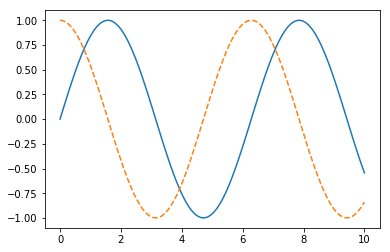

In [295]:
import numpy as np

x = np.linspace(0, 10, 100)

fig = plt.figure()               # создаём активный текущий рисунок
plt.plot(x, np.sin(x), '-')      # помещаем на него один график
plt.plot(x, np.cos(x), '--')     # помещаем на него второй график

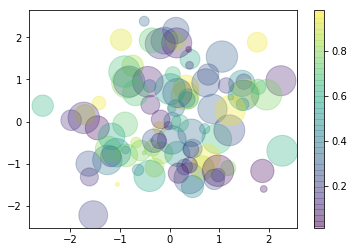

In [296]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

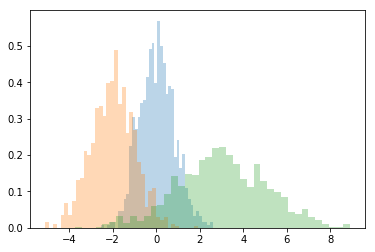

In [297]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

### Что осталось за кадром

- Вообще всё